In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', # PREVIOUS limit was set to '5000', which we can change as many as rows you want
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '06b71759-14c9-43e8-891c-655a3e806252',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


# NOTE::
# I had to go in and put "jupyter notebook -- NotebookApp.iopub_data_rate_limit=le10"
# Into the Anaconda Terminal/Prompt to chnage this to allow to pull data, ELSE it will show error

# If thta don't work , USE the localhost URL which will be prompted by the terminal

{'status': {'timestamp': '2023-03-13T09:41:47.333Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9063}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10089, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd
# this allows us to see all th e columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# This Normalized the data and makes it all pretty in DataFrame

df = pd.json_normalize(data['data'])

# New COLUMN 'Timestamp' Added::-> it will take the date time stamp of at that very moment when it is running
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10089,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931618e+07,1.931618e+07,NaN,1,NaN,NaN,None,2023-03-13T09:39:00.000Z,21931.283195,3.741762e+10,74.2724,-2.156547,6.591896,-2.114959,1.117879,20.765387,27.479559,4.236285e+11,42.0286,4.605569e+11,None,2023-03-13T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 04:41:52.820584
1,1027,Ethereum,ETH,ethereum,6572,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-03-13T09:39:00.000Z,1572.074653,1.390034e+10,45.9373,-1.805119,6.478997,0.541635,3.262704,12.299554,23.955224,1.923809e+11,19.0466,1.923809e+11,None,2023-03-13T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 04:41:52.820584
2,825,Tether,USDT,tether,49174,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.255380e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-03-13T09:39:00.000Z,1.003402,6.066960e+10,45.1840,0.015969,-0.503608,0.331189,0.319670,0.338846,0.311856,7.280067e+10,7.1990,7.339063e+10,None,2023-03-13T09:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-13 04:41:52.820584
3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578926e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-03-13T09:39:00.000Z,296.854302,8.991453e+08,133.4714,-3.179197,6.682047,3.976022,-3.799474,4.735373,11.318272,4.687109e+10,4.6349,4.749074e+10,None,2023-03-13T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 04:41:52.820584
4,3408,USD Coin,USDC,usd-coin,10575,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.106324e+10,4.106324e+10,NaN,5,NaN,NaN,None,2023-03-13T09:39:00.000Z,0.988919,1.000079e+10,-28.0883,-0.243078,3.220115,-1.112234,-1.106872,-1.104423,-1.121409,4.060821e+10,4.0156,4.060821e+10,None,2023-03-13T09:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-13 04:41:52.820584
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-03-13T09:39:00.000Z,0.361057,1.493564e+09,96.2018,-1.851625,-0.430229,-0.410243,-5.567286,-3.279816,-5.337641,1.839617e+10,1.8191,3.610568e+10,None,2023-03-13T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 04:41:52.820584
6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.469516e+10,3.557370e+10,NaN,7,NaN,NaN,None,2023-03-13T09:39:00.000Z,0.333132,5.496609e+08,71.9644,-1.808497,8.426985,-0.272718,-7.421306,3.225713,9.850274,1.155805e+10,1.1429,1.499092e+10,None,2023-03-13T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 04:41:52.820584
7,3890,Polygon,MATIC,polygon,608,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-03-13T09:39:00.000Z,1.104808,8.438787e+08,88.8041,-2.692060,3.593136,-1.732988,-10.716020,25.229866,23.768950,9.649747e+09,0.9554,1.104808e+10,None,2023-03-13T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 04:41:52.820584
8,74,Dogecoin,DOGE,dogecoin,656,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,None,2023-03-13T0

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', # PREVIOUS limit was set to '5000', which we can change as many as rows you want
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '06b71759-14c9-43e8-891c-655a3e806252',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


# NOTE::
# I had to go in and put "jupyter notebook -- NotebookApp.iopub_data_rate_limit=le10"
# Into the Anaconda Terminal/Prompt to chnage this to allow to pull data, ELSE it will show error
# If thta don't work , USE the localhost URL which will be prompted by the terminal
    
    df = pd.json_normalize(data['data'])
    # New COLUMN 'Timestamp' Added::-> it will take the date time stamp of at that very moment when it is running
    df['timestamp'] = pd.Timestamp('now')
    df
    
    # Path where you want to store the csv file for the generated data
    if not os.path.isfile(r'/Users/vickancer/Desktop/DATA ANALYST/Python Project/Crypto_API.csv'):
        df.to_csv(r'/Users/vickancer/Desktop/DATA ANALYST/Python Project/Crypto_API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/vickancer/Desktop/DATA ANALYST/Python Project/Crypto_API.csv', mode='a', header=False)
        # 'Header=False' so it doesn't create header every time....we only once in our csv file


In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #Sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [7]:
df_api = pd.read_csv(r'/Users/vickancer/Desktop/DATA ANALYST/Python Project/Crypto_API.csv')
df_api

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10089,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.931618e+07,1.931618e+07,NaN,1,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,22484.324938,3.597558e+10,58.2465,0.276228,9.411770,0.409503,3.578176,24.187563,31.007314,4.343112e+11,42.2681,4.721708e+11,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
1,1,1027,Ethereum,ETH,ethereum,6572,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,1607.987047,1.324600e+10,28.5120,0.058999,9.042436,2.982744,5.699931,15.185152,27.091895,1.967756e+11,19.1571,1.967756e+11,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
2,2,825,Tether,USDT,tether,49173,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.255380e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,1.003534,5.845004e+10,29.3116,-0.065897,-0.511963,0.344092,0.332352,0.353748,0.320635,7.281022e+10,7.0834,7.340026e+10,NaN,2023-03-13T08:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-13 03:16:18.171592
3,3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578926e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,305.135443,8.470762e+08,107.9737,0.316529,9.743850,7.201130,-1.045676,7.416465,15.782465,4.817862e+10,4.6871,4.881556e+10,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
4,4,3408,USD Coin,USDC,usd-coin,10573,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.106324e+10,4.106324e+10,NaN,5,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,0.991732,9.949202e+09,-36.0275,0.030825,4.427893,-0.822768,-0.841999,-0.830171,-0.826098,4.072371e+10,3.9619,4.072371e+10,NaN,2023-03-13T08:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-13 03:16:18.171592
5,5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,0.367944,1.421942e+09,80.2428,-0.316603,1.767743,1.418624,-3.661653,-1.340403,-3.794369,1.874707e+10,1.8238,3.679437e+10,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
6,6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.469516e+10,3.557370e+10,NaN,7,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,0.340012,5.285106e+08,56.7659,-0.387656,11.370211,2.148258,-5.438776,5.003493,12.479893,1.179677e+10,1.1477,1.530054e+10,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
7,7,3890,Polygon,MATIC,polygon,608,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,1.136873,8.179291e+08,69.7177,-0.064874,7.709720,1.035599,-8.265789,28.425916,28.663782,9.929810e+09,0.9667,1.136873e+10,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
8,8,74,Dogecoin,DOGE,dogecoin,656,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,NaN,2023-03

In [8]:
pd.set_option('display.float_format',lambda x:'%.5f' %x)

# to display the numbers in better readable format rather than in '45e+...'

In [9]:
df_api

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10089,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19316175.00000,19316175.00000,NaN,1,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,22484.32494,35975578693.43813,58.24650,0.27623,9.41177,0.40950,3.57818,24.18756,31.00731,434311155264.33221,42.26810,472170823703.50000,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
1,1,1027,Ethereum,ETH,ethereum,6572,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,1607.98705,13245999305.10807,28.51200,0.05900,9.04244,2.98274,5.69993,15.18515,27.09190,196775591750.54892,19.15710,196775591750.54999,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
2,2,825,Tether,USDT,tether,49173,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,72553804547.14275,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,1.00353,58450037511.89245,29.31160,-0.06590,-0.51196,0.34409,0.33235,0.35375,0.32064,72810217533.79955,7.08340,73400257228.35001,NaN,2023-03-13T08:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-13 03:16:18.171592
3,3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157892569.56985,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,305.13544,847076190.03310,107.97370,0.31653,9.74385,7.20113,-1.04568,7.41646,15.78246,48178619109.36982,4.68710,48815557007.86000,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
4,4,3408,USD Coin,USDC,usd-coin,10573,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,41063239614.11053,41063239614.11053,NaN,5,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,0.99173,9949201890.15219,-36.02750,0.03083,4.42789,-0.82277,-0.84200,-0.83017,-0.82610,40723709662.42627,3.96190,40723709662.43000,NaN,2023-03-13T08:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-13 03:16:18.171592
5,5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,0.36794,1421941501.39794,80.24280,-0.31660,1.76774,1.41862,-3.66165,-1.34040,-3.79437,18747068088.33189,1.82380,36794371294.38000,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
6,6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34695161388.35200,35573698990.42300,NaN,7,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,0.34001,528510576.89592,56.76590,-0.38766,11.37021,2.14826,-5.43878,5.00349,12.47989,11796767968.06981,1.14770,15300535790.02000,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592
7,7,3890,Polygon,MATIC,polygon,608,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,NaN,2023-03-13T08:14:00.000Z,1.13687,817929129.95204,69.71770,-0.06487,7.70972,1.03560,-8.26579,28.42592,28.66378,9929810283.44772,0.96670,11368730655.31000,NaN,2023-03-13T08:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-13 03:16:18.171592


In [10]:
# grouping the acquired data based on the columns

df_sort = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_sort



,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.23808,7.29387,-1.63430,1.50091,21.30225,28.05166
Ethereum,-1.05598,7.15735,0.86704,3.56138,12.68712,24.32333
Tether,0.04315,-0.45951,0.34297,0.33069,0.34838,0.32113
BNB,-2.60078,6.41777,3.52880,-4.28091,4.38377,10.84420
USD Coin,-0.13219,3.37977,-1.03026,-1.02640,-1.02285,-1.03911
XRP,-1.31212,-0.48740,-0.71535,-5.83325,-3.30320,-5.53415
Cardano,-1.68471,8.20990,-0.55587,-8.01898,2.87744,8.99483
Polygon,-1.52277,3.32574,-1.73014,-10.93615,25.24314,23.55273
Dogecoin,-1.64061,3.78101,-6.74355,-15.45827,-12.29429,-22.23322


In [11]:
# To display even columns ar rows
df_stack = df_sort.stack()
df_stack

name                                     
Bitcoin      quote.USD.percent_change_1h     -1.23808
             quote.USD.percent_change_24h     7.29387
             quote.USD.percent_change_7d     -1.63430
             quote.USD.percent_change_30d     1.50091
             quote.USD.percent_change_60d    21.30225
             quote.USD.percent_change_90d    28.05166
Ethereum     quote.USD.percent_change_1h     -1.05598
             quote.USD.percent_change_24h     7.15735
             quote.USD.percent_change_7d      0.86704
             quote.USD.percent_change_30d     3.56138
             quote.USD.percent_change_60d    12.68712
             quote.USD.percent_change_90d    24.32333
Tether       quote.USD.percent_change_1h      0.04315
             quote.USD.percent_change_24h    -0.45951
             quote.USD.percent_change_7d      0.34297
             quote.USD.percent_change_30d     0.33069
             quote.USD.percent_change_60d     0.34838
             quote.USD.percent_change_90

In [12]:
type(df_sort)

pandas.core.frame.DataFrame

In [13]:
type(df_stack)

# It became SERIES after the STACK, and we can't use it, so we need to convert it back into DATAFRAME

pandas.core.series.Series

In [14]:
df_stack_to_df = df_stack.to_frame(name='values')
df_stack_to_df

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -1.23808
            quote.USD.percent_change_24h   7.29387
            quote.USD.percent_change_7d   -1.63430
            quote.USD.percent_change_30d   1.50091
            quote.USD.percent_change_60d  21.30225
            quote.USD.percent_change_90d  28.05166
Ethereum    quote.USD.percent_change_1h   -1.05598
            quote.USD.percent_change_24h   7.15735
            quote.USD.percent_change_7d    0.86704
            quote.USD.percent_change_30d   3.56138
            quote.USD.percent_change_60d  12.68712
            quote.USD.percent_change_90d  24.32333
Tether      quote.USD.percent_change_1h    0.04315
            quote.USD.percent_change_24h  -0.45951
            quote.USD.percent_change_7d    0.34297
            quote.USD.percent_change_30d   0.33069
            quote.USD.percent_change_60d   0.34838
            quote.USD.percent_change_90d   0.32113
BNB         quote.USD.percent_change_1h   -2.60078
            quote.USD.percent_change_24h   6.41777
            quote.USD.percent_change_7d    3.52880
            quote.USD.percent_change_30d  -4.28091
            quote.USD.percent_change_60d   4.38377
            quote.USD.percent_change_90d  10.84420
USD Coin    quote.USD.percent_change_1h   -0.13219
            quote.USD.percent_change_24h   3.37977
            quote.USD.percent_change_7d   -1.03026
            quote.USD.percent_change_30d  -1.02640
            quote.USD.percent_change_60d  -1.02285
            quote.USD.percent_change_90d  -1.03911
XRP         quote.USD.percent_change_1h   -1.31212
            quote.USD.percent_change_24h  -0.48740
            quote.USD.percent_change_7d   -0.71535
            quote.USD.percent_change_30d  -5.83325
            quote.USD.percent_change_60d  -3.30320
            quote.USD.percent_change_90d  -5.53415
Cardano     quote.USD.percent_change_1h   -1.68471
            quote.USD.percent_change_24h   8.20990
            quote.USD.percent_change_7d   -0.55587
            quote.USD.percent_change_30d  -8.01898
            quote.USD.percent_change_60d   2.87744
            quote.USD.percent_change_90d   8.99483
Polygon     quote.USD.percent_change_1h   -1.52277
            quote.USD.percent_change_24h   3.32574
            quote.USD.percent_change_7d   -1.73014
            quote.USD.percent_change_30d -10.93615
            quote.USD.percent_change_60d  25.24314
            quote.USD.percent_change_90d  23.55273
Dogecoin    quote.USD.percent_change_1h   -1.64061
            quote.USD.percent_change_24h   3.78101
            quote.USD.percent_change_7d   -6.74355
            quote.USD.percent_change_30d -15.45827
            quote.USD.percent_change_60d -12.29429
            quote.USD.percent_change_90d -22.23322
Binance USD quote.USD.percent_change_1h    0.08410
            quote.USD.percent_change_24h  -0.18799
            quote.USD.percent_change_7d    0.01675
            quote.USD.percent_change_30d   0.01984
            quote.USD.percent_change_60d   0.03047
            quote.USD.percent_change_90d  -0.01847
Solana      quote.USD.percent_change_1h   -2.14284
            quote.USD.percent_change_24h   5.76356
            quote.USD.percent_change_7d   -7.48966
            quote.USD.percent_change_30d  -5.86144
            quote.USD.percent_change_60d  18.78943
            quote.USD.percent_change_90d  46.52403
Polkadot    quote.USD.percent_change_1h   -1.69321
            quote.USD.percent_change_24h   4.23900
            quote.USD.percent_change_7d   -2.96791
            quote.USD.percent_change_30d  -7.37746
            quote.USD.percent_change_60d  13.33799
            quote.USD.percent_change_90d  12.87164
Dai         quote.USD.percent_change_1h   -0.07665
            quote.USD.percent_change_24h   3.26528
            quote.USD.percent_change_7d   -1.07584
            quote.USD.percent_change_30d  -1.05773
            quote.USD.percent_change_60d  -1.06110
            quo

In [15]:
df_stack_to_df.count()

values    90
dtype: int64

In [16]:
# we are formatting in a way that we can also get the index with name for each row

index = pd.Index(range(90))

df_index = df_stack_to_df.reset_index()
df_index

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.23808
1,Bitcoin,quote.USD.percent_change_24h,7.29387
2,Bitcoin,quote.USD.percent_change_7d,-1.63430
3,Bitcoin,quote.USD.percent_change_30d,1.50091
4,Bitcoin,quote.USD.percent_change_60d,21.30225
5,Bitcoin,quote.USD.percent_change_90d,28.05166
6,Ethereum,quote.USD.percent_change_1h,-1.05598
7,Ethereum,quote.USD.percent_change_24h,7.15735
8,Ethereum,quote.USD.percent_change_7d,0.86704
9,Ethereum,quote.USD.percent_change_30d,3.56138


In [17]:
df_naming = df_index.rename(columns={'level_1':'percent_change'})
df_naming

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.23808
1,Bitcoin,quote.USD.percent_change_24h,7.29387
2,Bitcoin,quote.USD.percent_change_7d,-1.63430
3,Bitcoin,quote.USD.percent_change_30d,1.50091
4,Bitcoin,quote.USD.percent_change_60d,21.30225
5,Bitcoin,quote.USD.percent_change_90d,28.05166
6,Ethereum,quote.USD.percent_change_1h,-1.05598
7,Ethereum,quote.USD.percent_change_24h,7.15735
8,Ethereum,quote.USD.percent_change_7d,0.86704
9,Ethereum,quote.USD.percent_change_30d,3.56138


In [18]:
# chaning the name of the values in 'percent chnage_duration' so it can show properly in the plots

df_naming['percent_change'] = df_naming['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df_naming 


,name,percent_change,values
0,Bitcoin,1h,-1.23808
1,Bitcoin,24h,7.29387
2,Bitcoin,7d,-1.63430
3,Bitcoin,30d,1.50091
4,Bitcoin,60d,21.30225
5,Bitcoin,90d,28.05166
6,Ethereum,1h,-1.05598
7,Ethereum,24h,7.15735
8,Ethereum,7d,0.86704
9,Ethereum,30d,3.56138


In [19]:
# Now we are going to create some VISUALIZATIONs....

import seaborn as sns
import matplotlib.pyplot as plt

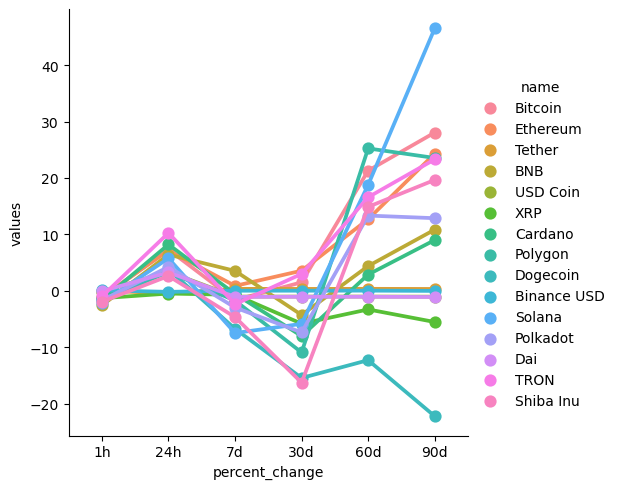

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df_naming,kind='point')


In [21]:
sns.catplot(x='percent_change', y='values', hue='name', data=df_naming,kind='bar')

In [22]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,22033.80008,2023-03-13 05:00:02.142935


In [23]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

<AxesSubplot:xlabel='percent_change', ylabel='values'>